<a href="https://colab.research.google.com/github/RCutrino/MLPNS_RCutrino/blob/main/StellarPopClustersLab_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster

data from this paper: color magnitude diagrams of NGC 2808: https://arxiv.org/pdf/1906.04983.pdf


In [2]:
cmag = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS_FBianco/main/clustering/colormag_NGC2808.csv", header=None)
cmag

,0,1
0,-0.286449,19.920797
1,-0.273440,20.197264
2,-0.270112,19.915151
3,-0.243489,20.285819
4,-0.213538,19.689023
...,...,...
596,1.540265,17.014947
597,1.540265,18.009830
598,1.540265,19.012137
599,1.540265,20.007020


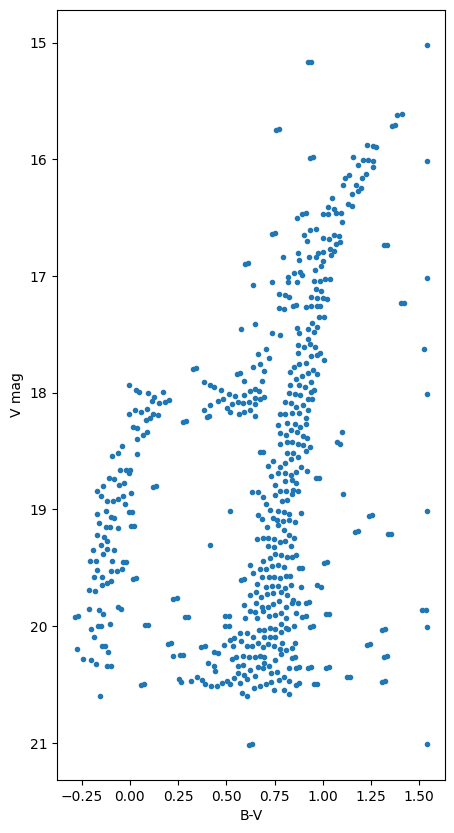

In [3]:
pl.figure(figsize=(5,10))

pl.plot(cmag.iloc[:,0], cmag.iloc[:,1], '.')
pl.xlabel("B-V")
pl.ylabel("V mag")
pl.gca().invert_yaxis()

In [4]:
X = preprocessing.scale(cmag, axis=0)

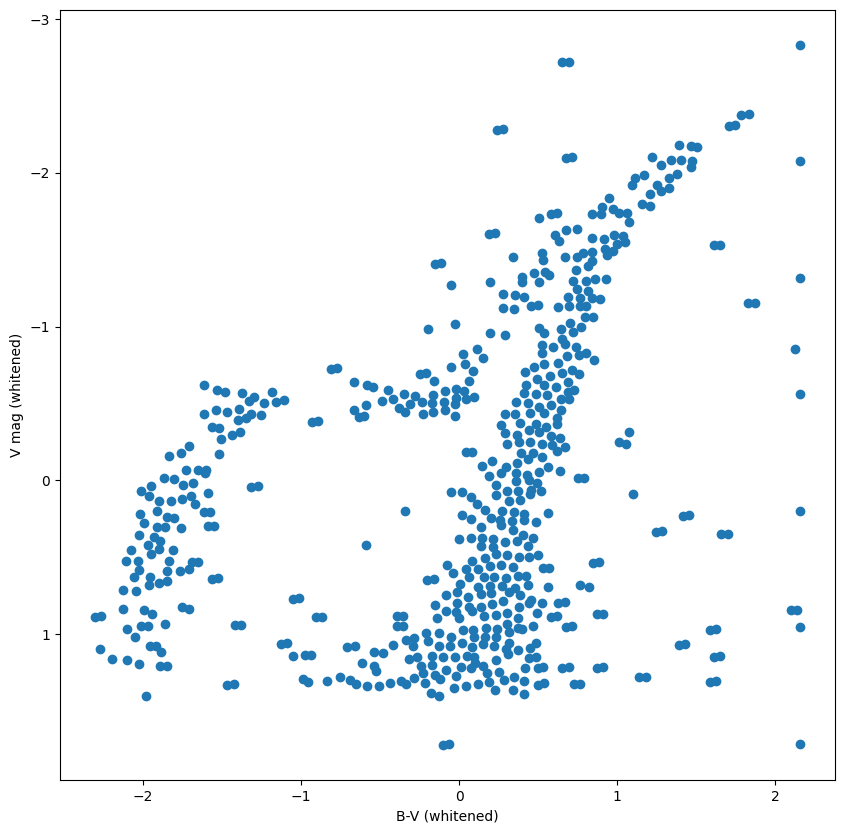

In [5]:
pl.figure(figsize=(10,10))

pl.scatter(X[:,0], X[:,1])
pl.xlabel("B-V (whitened)")
pl.ylabel("V mag (whitened)")
pl.gca().invert_yaxis()

inertia with 2 clusters:649.0390727521626
inertia with 3 clusters:336.12995708629114
inertia with 4 clusters:293.3699574057963
inertia with 5 clusters:192.47303267419989
inertia with 6 clusters:161.47521359631946
inertia with 7 clusters:136.45481467814867
inertia with 8 clusters:117.55417751080417
inertia with 9 clusters:97.49570048306946


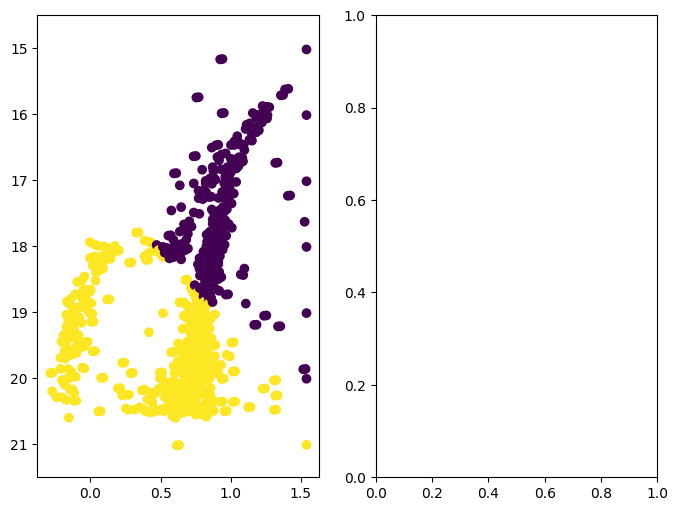

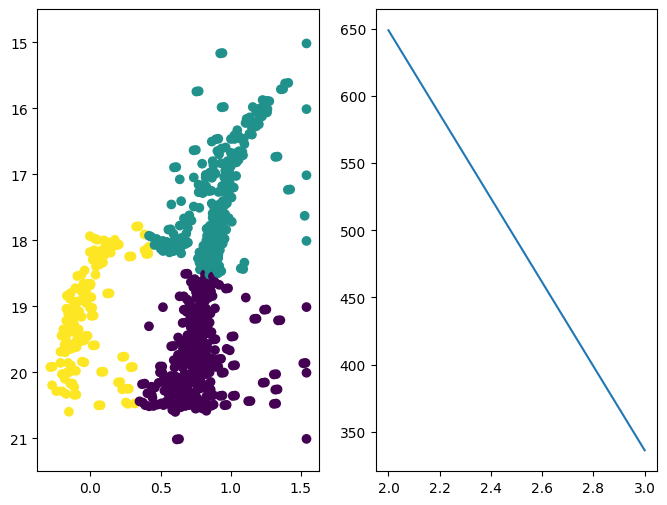

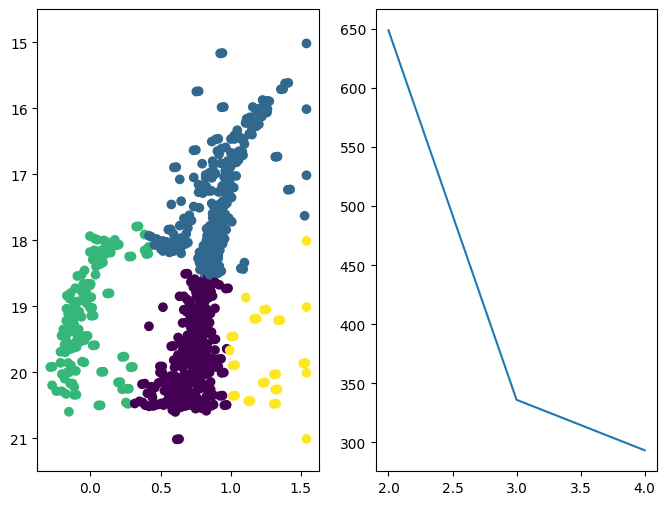

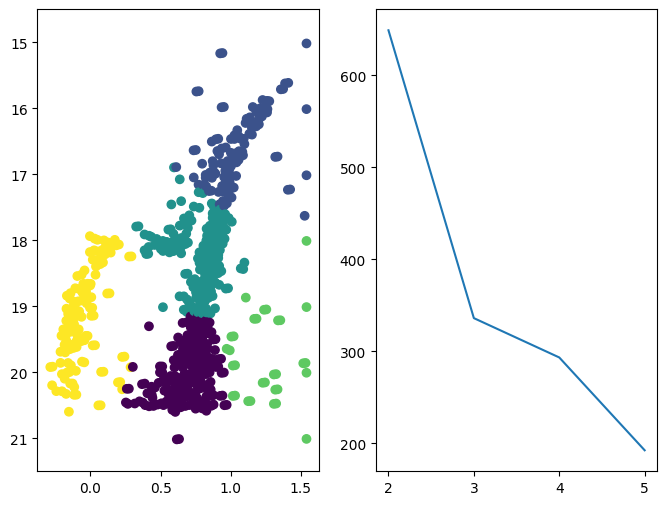

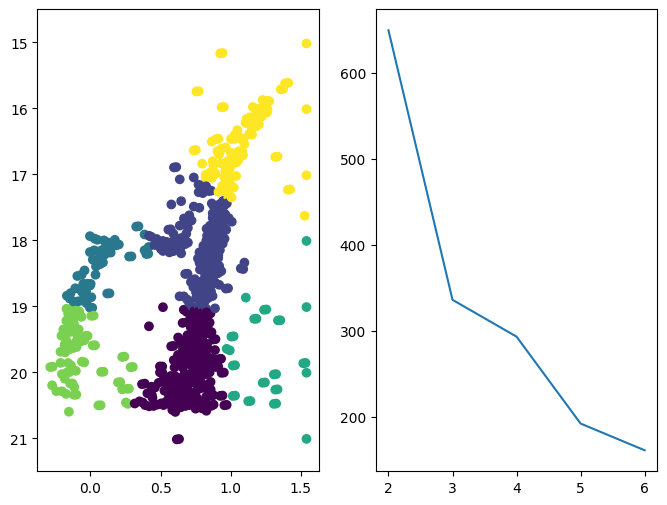

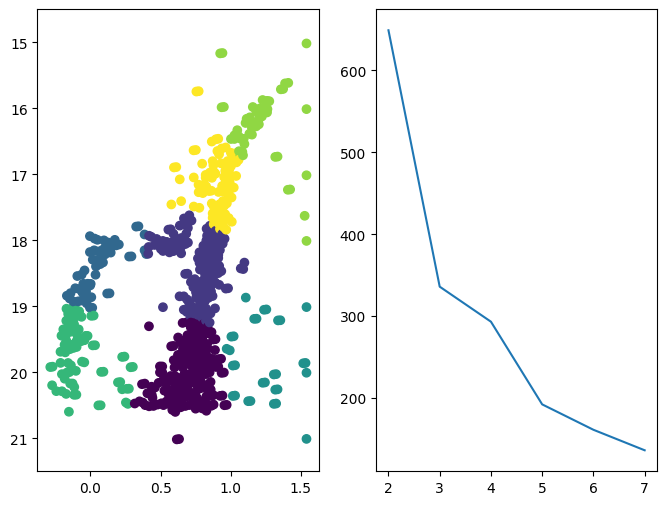

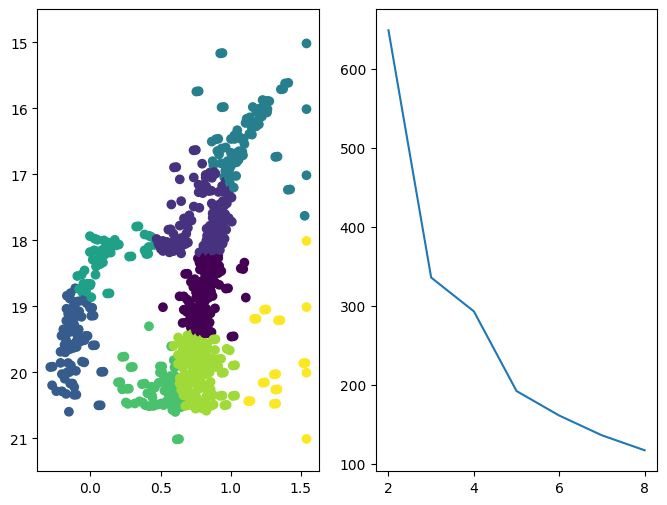

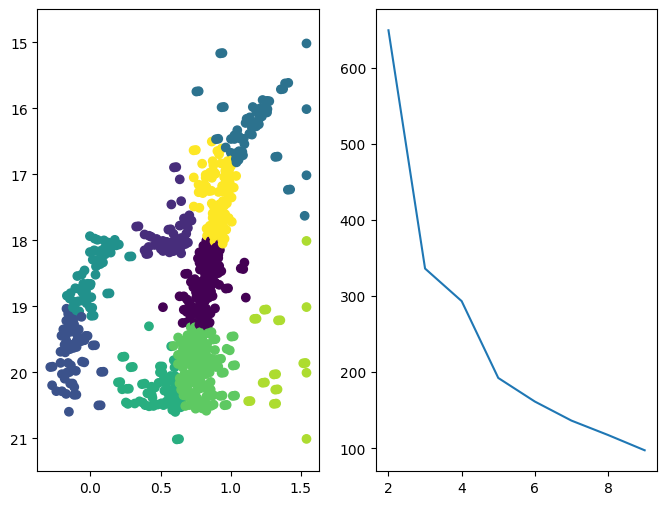

In [6]:
tv = []
for i in range(2, 10):
    km = skl.cluster.KMeans(i, n_init='auto',
                            random_state=302).fit(X)
    tv.append(km.inertia_)
    print("inertia with {} clusters:{}".format(i, km.inertia_))
    fig, ax = pl.subplots(1, 2, figsize=(8,6))
    ax[0].scatter(cmag.iloc[:,0], 
                 cmag.iloc[:,1],  
                 cmap="viridis", c=(km.labels_ + 1) /4)
    
    ax[0].set_ylim(21.5, 14.5)
    if i>2:
      ax[1].plot(range(2,i+1), tv)

In [7]:
# what does the distribution of distances to the closest object look like ?
# this might help chose the hyperparameter cmin
dm = sp.spatial.distance.squareform(sp.spatial.distance.pdist(X))
dm[dm == 0] = dm.max()

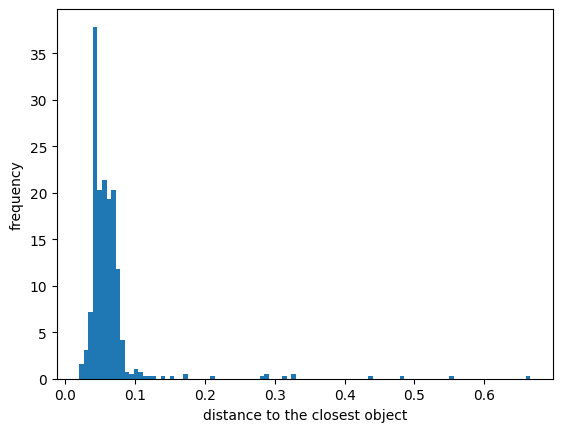

In [8]:
pl.hist(dm.min(0), bins=100, density=True);
pl.ylabel("frequency")
pl.xlabel("distance to the closest object");

In [9]:
dbs = skl.cluster.DBSCAN(eps=0.2, min_samples=8)
dbs.fit(X)

DBSCAN(eps=0.2, min_samples=8)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [10]:
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_, len(labels)

(3, 83, 601)

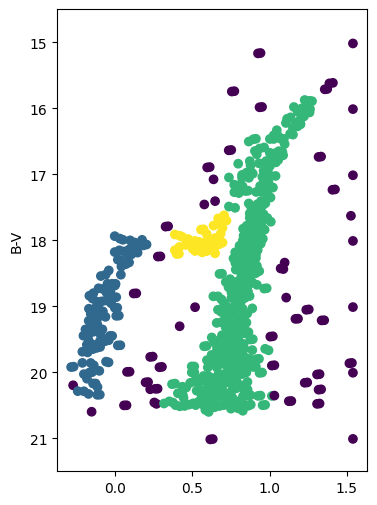

In [11]:
pl.figure(figsize=(4,6))

pl.scatter(cmag.iloc[:, 0], 
           cmag.iloc[:, 1],
            c=(labels + 1) /4);
pl.ylim(21.5, 14.5)
pl.ylabel("V")
pl.ylabel("B-V");

In [12]:
model = cluster.KMeans(n_clusters=3, random_state=302)

In [14]:
cmag_scaled = preprocessing.scale(cmag, axis=0)
model.fit(cmag_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=302)

In [15]:
model.cluster_centers_

array([[ 0.2930383 ,  0.77187379],
       [ 0.62251398, -1.09094667],
       [-1.61167123,  0.31291912]])

In [17]:
model.inertia_

336.09752492000223

In [18]:
model.cluster_centers_[0]

array([0.2930383 , 0.77187379])

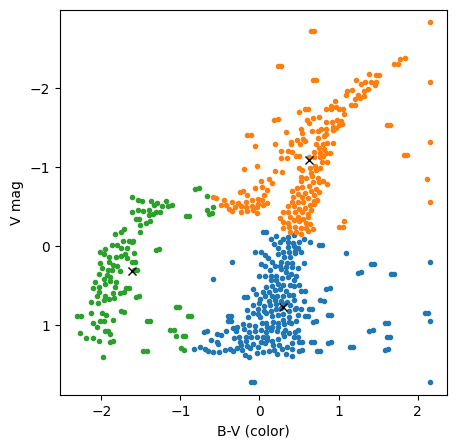

In [19]:

ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in range(3): 
  ax.plot(cmag_scaled[model.labels_==i,0], cmag_scaled[model.labels_==i,1], '.')
  ax.plot(model.cluster_centers_[i,0], model.cluster_centers_[i,1], 'kx')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis();

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 0, 'n clusters')

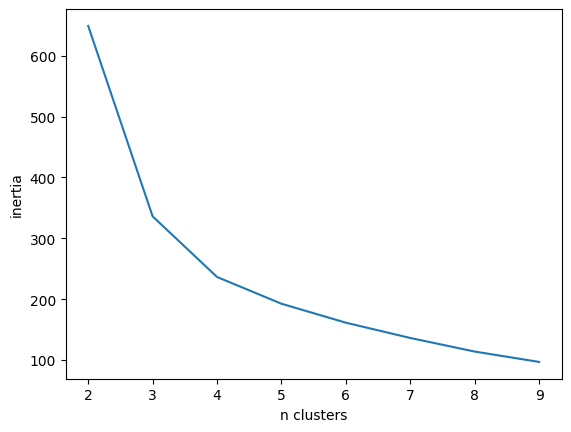

In [20]:
inertias = []
for nc in range(2, 10):
  model = cluster.KMeans(n_clusters=nc, random_state=302).fit(cmag_scaled)
  inertias.append(model.inertia_)

pl.plot(range(2,10), inertias)
pl.ylabel("inertia")
pl.xlabel("n clusters")

In [21]:
modeldbs = cluster.DBSCAN(eps=0.001).fit(cmag_scaled)

In [22]:
modeldbs.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

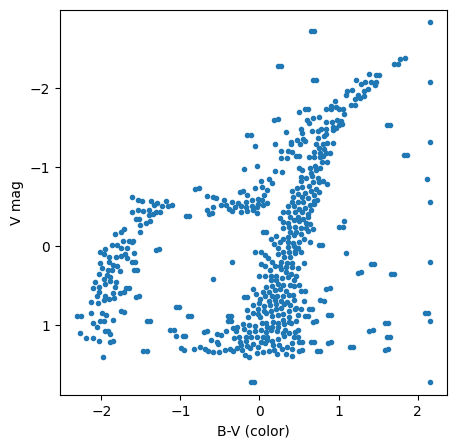

In [23]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in  np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis();

In [24]:

for e in np.arange(0.001, 1, 0.001):
  modeldbs = cluster.DBSCAN(eps=e, min_samples=10).fit(cmag_scaled)
  if modeldbs.labels_.max() > 0:
    print(e, modeldbs.labels_.max())

0.109 1
0.11 1
0.111 1
0.112 2
0.113 3
0.114 3
0.115 3
0.116 6
0.117 8
0.11800000000000001 10
0.11900000000000001 11
0.12000000000000001 12
0.121 12
0.122 12
0.123 13
0.124 13
0.125 9
0.126 6
0.127 6
0.128 7
0.129 7
0.13 6
0.131 6
0.132 5
0.133 5
0.134 5
0.135 5
0.136 5
0.137 5
0.138 4
0.139 3
0.14 3
0.14100000000000001 3
0.14200000000000002 4
0.14300000000000002 4
0.14400000000000002 4
0.14500000000000002 4
0.146 5
0.147 6
0.148 6
0.149 6
0.15 6
0.151 6
0.152 5
0.153 6
0.154 6
0.155 6
0.156 6
0.157 6
0.158 6
0.159 7
0.16 7
0.161 7
0.162 7
0.163 7
0.164 7
0.165 7
0.166 7
0.167 7
0.168 7
0.169 6
0.17 6
0.171 6
0.17200000000000001 6
0.17300000000000001 6
0.17400000000000002 5
0.17500000000000002 5
0.17600000000000002 5
0.177 5
0.178 5
0.179 4
0.18 4
0.181 4
0.182 4
0.183 4
0.184 4
0.185 3
0.186 3
0.187 3
0.188 3
0.189 3
0.19 3
0.191 3
0.192 3
0.193 3
0.194 3
0.195 3
0.196 3
0.197 3
0.198 2
0.199 2
0.2 2
0.201 2
0.202 2
0.203 2
0.20400000000000001 2
0.20500000000000002 2
0.206000000000000

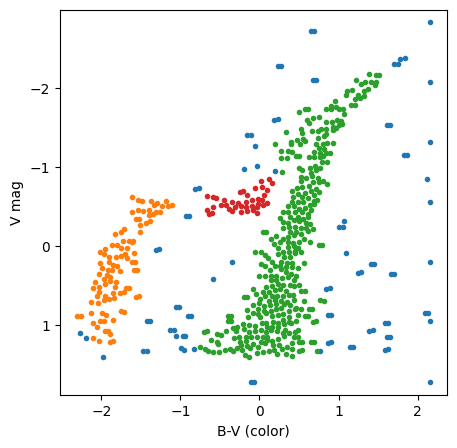

In [25]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
modeldbs = cluster.DBSCAN(eps=0.2, min_samples=10).fit(cmag_scaled)
for i in  np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis();